# Occupancy Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [12]:
%matplotlib inline
sns.set_style('whitegrid')
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head(5)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
df=df.drop(['time'], axis = 1)

# Encoding the dataset

## No encoding needed for this dataset

## Raw data visualisation and statistics

In [18]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [19]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


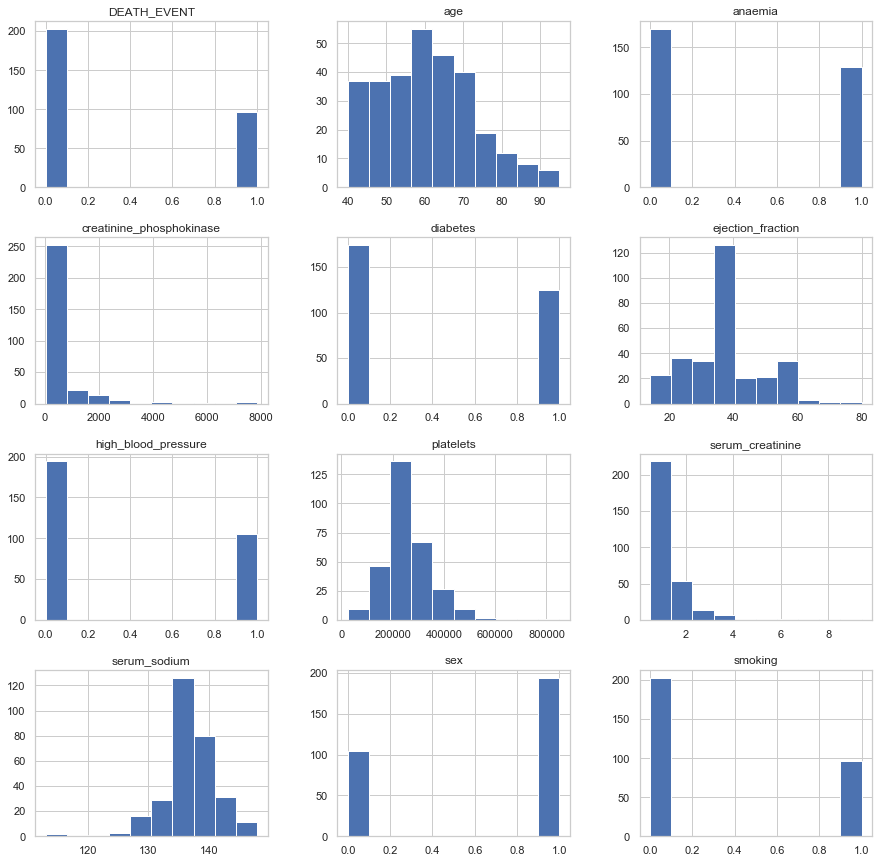

In [20]:
# histogram plots to visualise data distribution
df.hist(figsize=(15, 15))
plt.show()

## Taking care of missing data

In [21]:
print(df.isnull().sum()) 
print(sum(df.isnull().sum()))

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64
0



## Data cleaning Statregy:
<br> No missing data, no out of range data<br> 



## Data visualisation (pre-exploratory)

age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
DEATH_EVENT
12
0 1


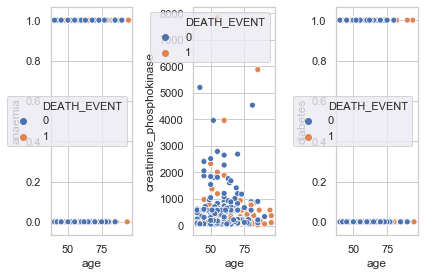

0 4


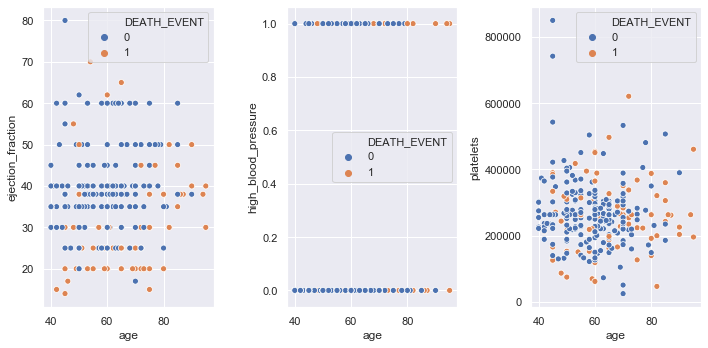

0 7


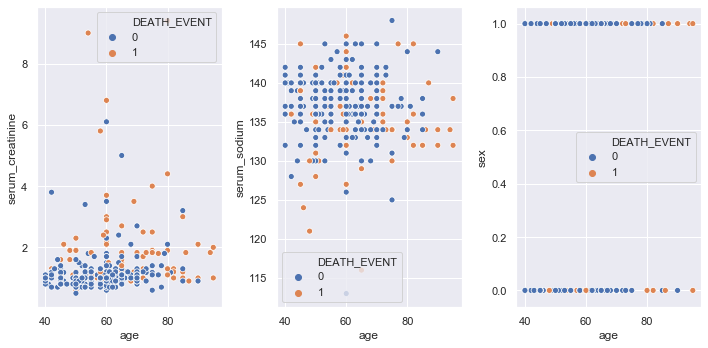

0 10


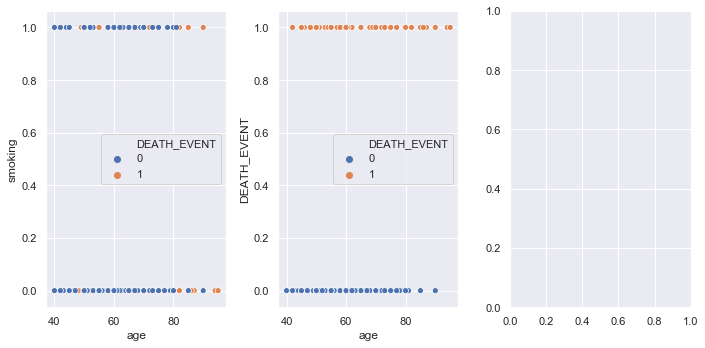

1 2


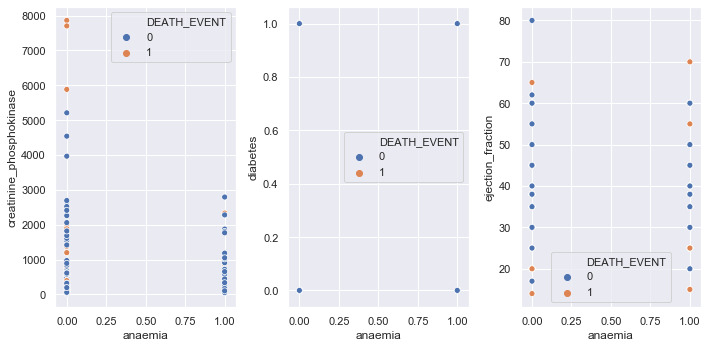

1 5


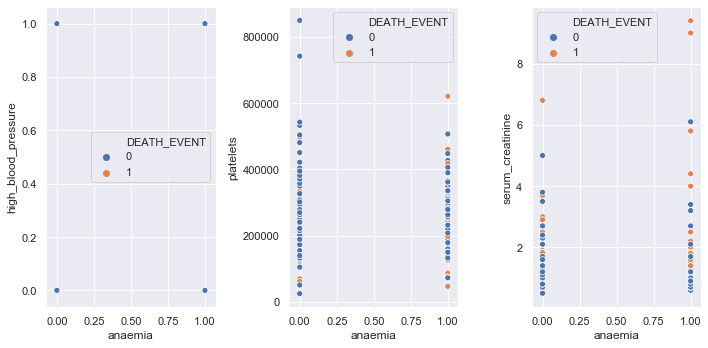

1 8


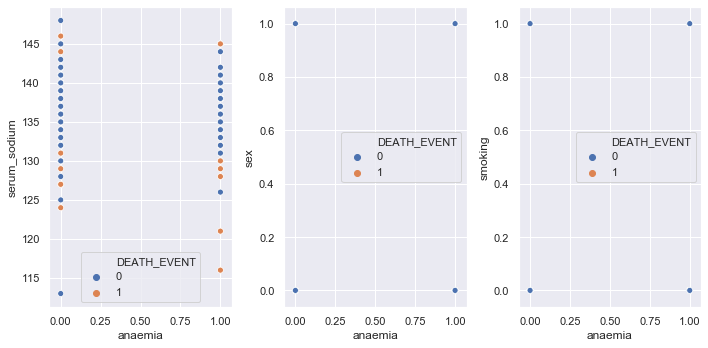

2 3


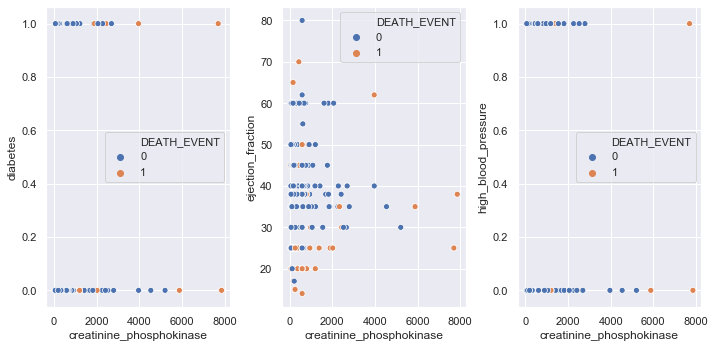

2 6


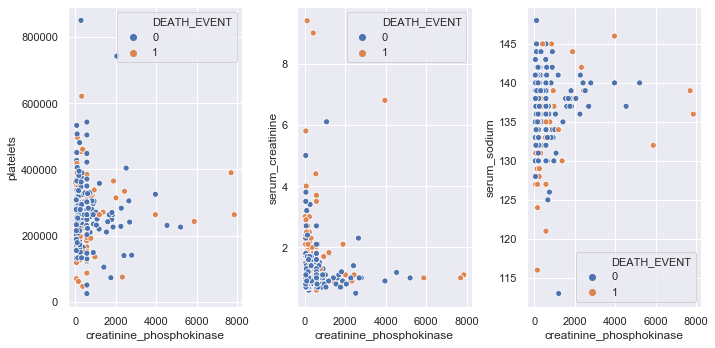

2 9


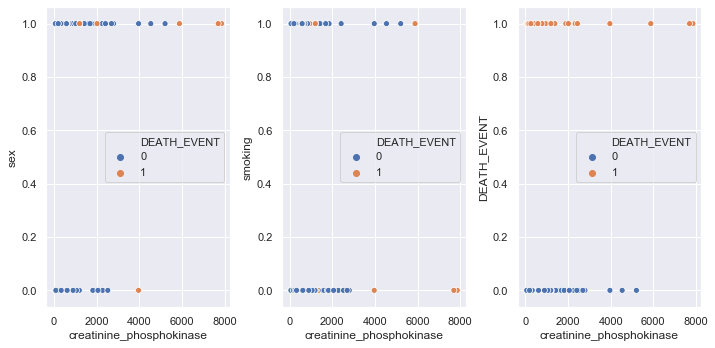

3 4


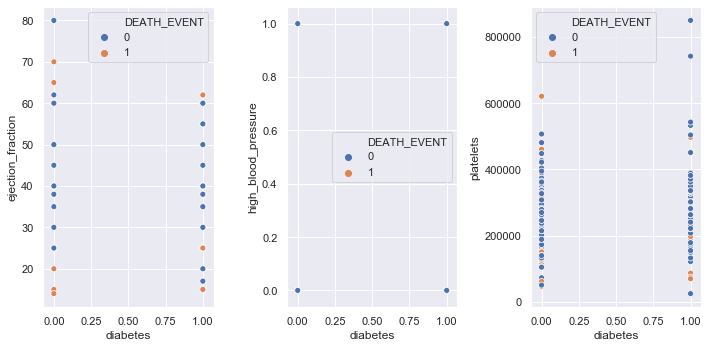

3 7


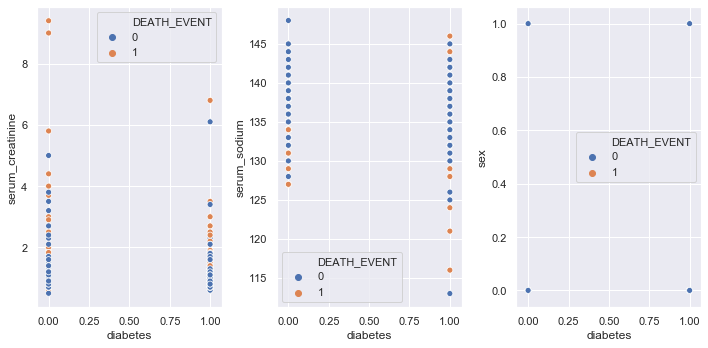

3 10


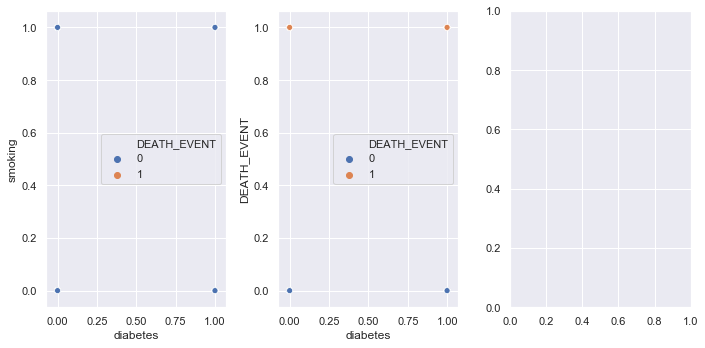

4 5


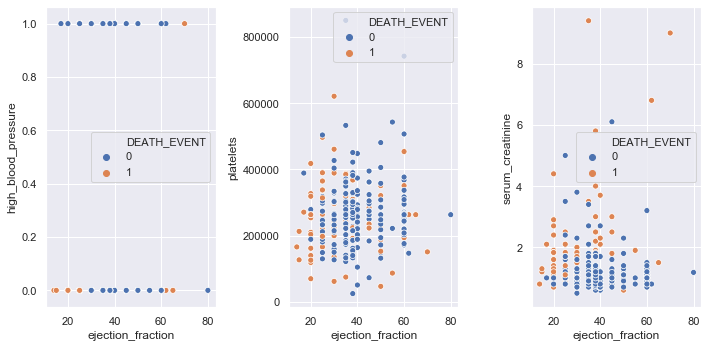

4 8


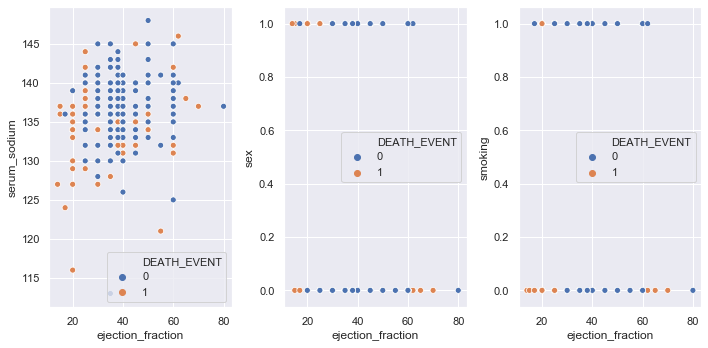

5 6


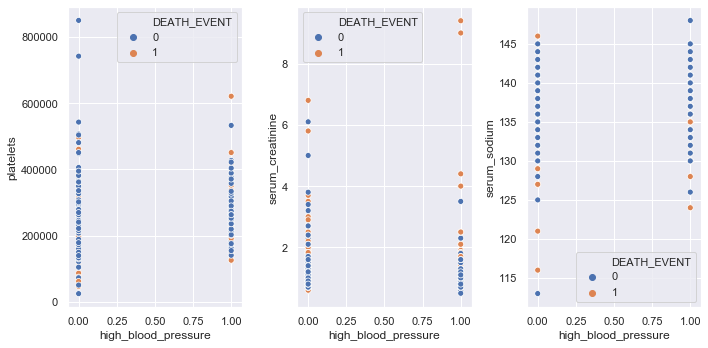

5 9


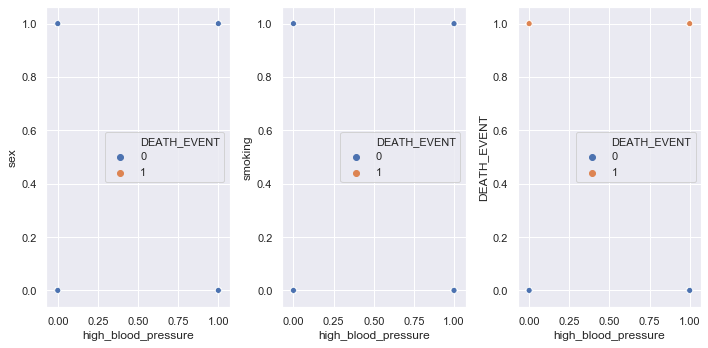

6 7


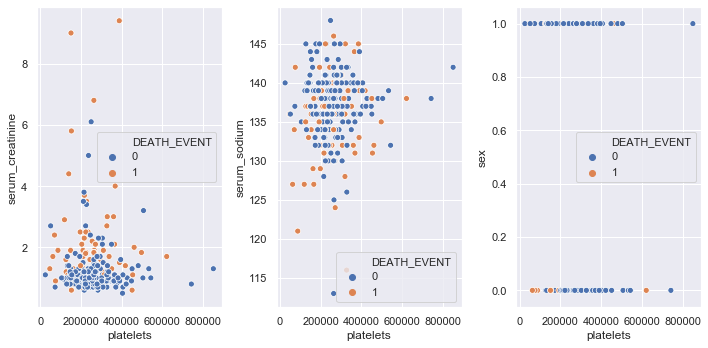

6 10


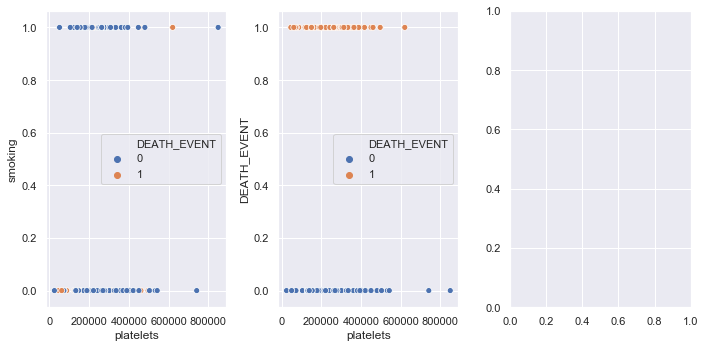

7 8


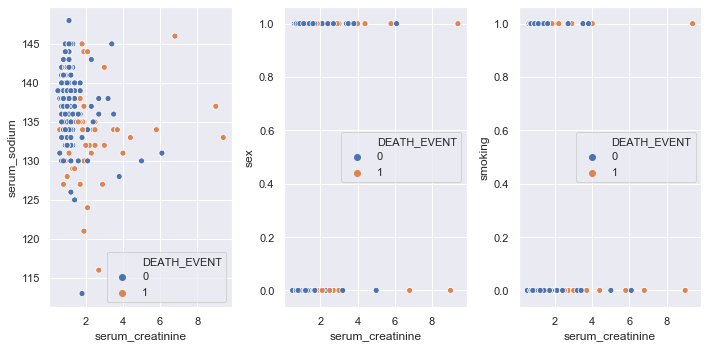

8 9


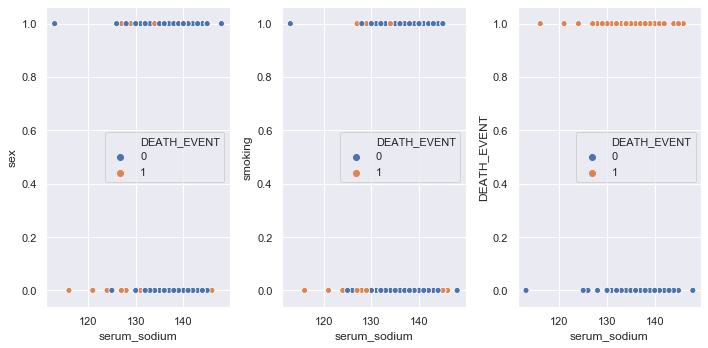

9 10


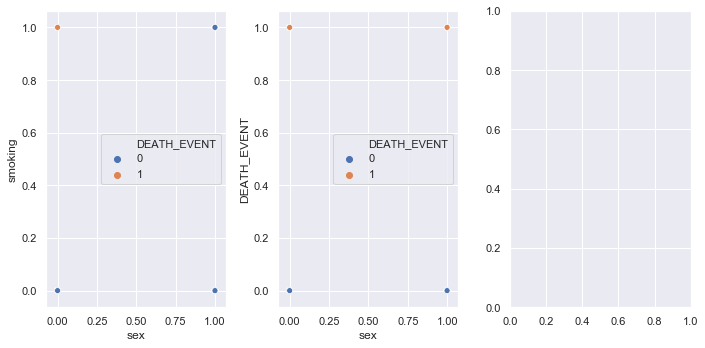

In [22]:
#understanding Pandas
ListAttr = []
lengthOfList = len(df)
for i in df:
    print(i)
    ListAttr.append(i)
print(len(ListAttr))    
 
for i in range(len(ListAttr)-1):
    for j in range(i+1,len(ListAttr)-1,3):
        print(i,j)
        #f, axes = plt.subplots(1, 2)
        #plt.figure(figsize=(5, 5))
        #sns.set_style()
        #sns.scatterplot(data=df, x=ListAttr[i], y=ListAttr[j], hue=ListAttr[-1])
        #plt.show()
        
        f, axes = plt.subplots(1, 3)
        #plt.figure(figsize=(10, 10))
        sns.set(rc={'figure.figsize':(10,5)})
        sns.set_style()
        sns.scatterplot(data=df, x=ListAttr[i], y=ListAttr[j]  , hue=ListAttr[-1], ax=axes[0])
        if (j+1 <= len(ListAttr)-1):
            sns.set_style()
            sns.scatterplot(data=df, x=ListAttr[i], y=ListAttr[j+1], hue=ListAttr[-1], ax=axes[1])
            if (j+2 <= len(ListAttr)-1):
                sns.set_style()
                sns.scatterplot(data=df, x=ListAttr[i], y=ListAttr[j+2], hue=ListAttr[-1], ax=axes[2])
        f.tight_layout()
        plt.show()
print()

## Dealing with data imbalance

### 1. Generate synthetic samples

## Splitting the dataframe in train and test sets

In [35]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df.iloc[:,:], test_size = 0.2, random_state = 0)
print(df_train)


      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
134  81.0        0                      4540         0                 35   
145  50.0        0                       185         0                 30   
63   45.0        0                       582         0                 35   
292  52.0        0                       190         1                 38   
284  50.0        1                        54         0                 40   
..    ...      ...                       ...       ...                ...   
251  55.0        0                       572         1                 35   
192  50.0        1                       121         1                 40   
117  85.0        1                       102         0                 60   
47   60.0        0                       582         1                 38   
172  70.0        1                       171         0                 60   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

NameError: name 'sklearn' is not defined

In [27]:
print(df_test)

        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
206  40.000        1                       101         0                 40   
188  60.667        1                       151         1                 40   
12   45.000        1                       981         0                 30   
219  55.000        0                       582         1                 35   
237  70.000        0                       232         0                 30   
136  65.000        1                        59         1                 60   
228  65.000        0                        56         0                 25   
205  50.000        1                       167         1                 45   
52   60.000        0                      3964         1                 62   
108  63.000        0                       936         0                 38   
240  70.000        0                        81         1                 35   
15   82.000        1                       379      

## Scaling the train set features 

In [28]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_train_scaled= min_max_scaler.fit_transform(df_train)

df_train_scaled= pd.DataFrame(data= df_train_scaled, columns=ListAttr)
print(df_train_scaled)
df_test_scaled= min_max_scaler.transform(df_test)
df_test_scaled= pd.DataFrame(data= df_test_scaled, columns=ListAttr)
print(df_test_scaled)


          age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    0.759259      0.0                  0.576295       0.0           0.437500   
1    0.185185      0.0                  0.020669       0.0           0.333333   
2    0.092593      0.0                  0.071319       0.0           0.437500   
3    0.222222      0.0                  0.021306       1.0           0.500000   
4    0.185185      1.0                  0.003955       0.0           0.541667   
..        ...      ...                       ...       ...                ...   
234  0.277778      0.0                  0.070043       1.0           0.437500   
235  0.185185      1.0                  0.012503       1.0           0.541667   
236  0.833333      1.0                  0.010079       0.0           0.958333   
237  0.370370      0.0                  0.071319       1.0           0.500000   
238  0.555556      1.0                  0.018882       0.0           0.958333   

     high_blood_pressure  p

## Features' Correlation coefficients and heatmap

In [29]:
correlation=df_train_scaled.corr(method='pearson')
print(correlation)

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.098708                 -0.042777   
anaemia                   0.098708  1.000000                 -0.180599   
creatinine_phosphokinase -0.042777 -0.180599                  1.000000   
diabetes                 -0.108466 -0.015524                  0.023367   
ejection_fraction         0.080409  0.026181                 -0.049302   
high_blood_pressure       0.075708 -0.000511                 -0.058403   
platelets                -0.081119 -0.051302                  0.041954   
serum_creatinine          0.212245  0.082863                 -0.081522   
serum_sodium             -0.012259  0.018179                  0.021081   
sex                       0.064324 -0.101341                  0.059879   
smoking                   0.001360 -0.103213                 -0.026151   
DEATH_EVENT               0.242167  0.066256                  0.084411   

                          diabetes  e

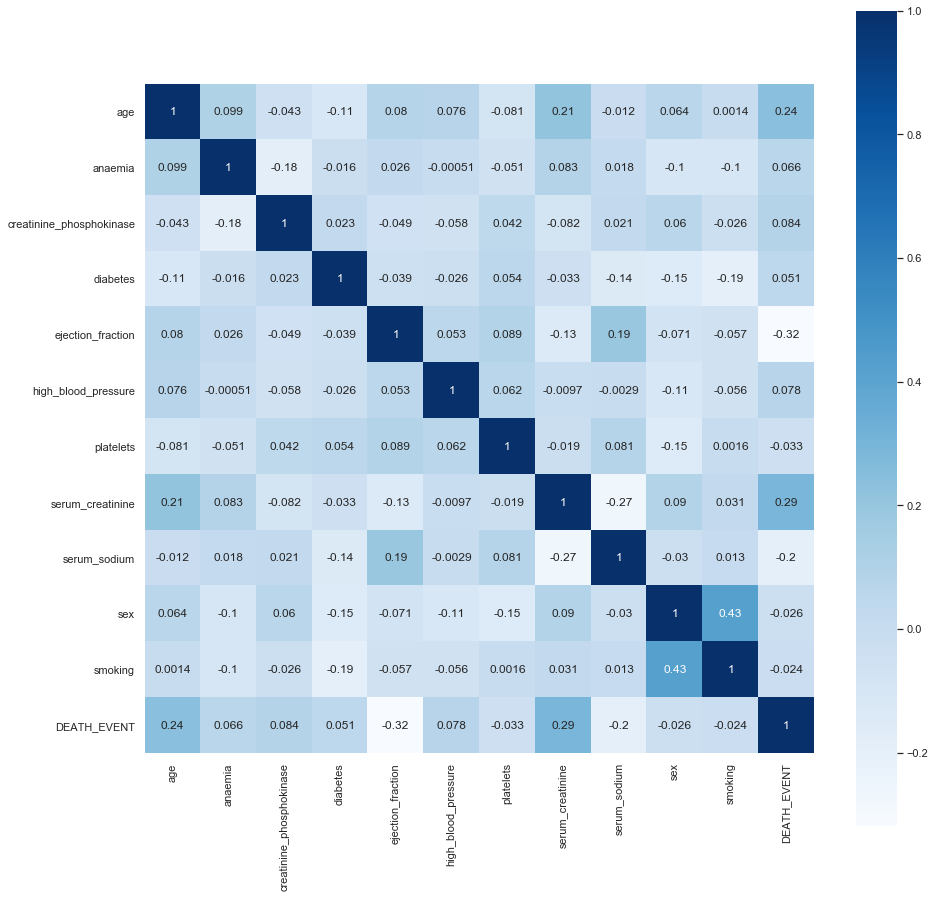

In [30]:
plt.figure(figsize=(15,15))
df_train_corr = df_train_scaled.corr()

sns.heatmap(df_train_scaled.corr(), square=True, annot=True, cmap="Blues");

## Defining independent and dependent variables

In [32]:
X_train=df_train_scaled.iloc[:, 0:-1]
y_train=df_train_scaled.iloc[:,-1]
X_test=df_test_scaled.iloc[:,0:-1]
y_test=df_test_scaled.iloc[:,-1]
print(X_train)
print(y_train)

          age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    0.759259      0.0                  0.576295       0.0           0.437500   
1    0.185185      0.0                  0.020669       0.0           0.333333   
2    0.092593      0.0                  0.071319       0.0           0.437500   
3    0.222222      0.0                  0.021306       1.0           0.500000   
4    0.185185      1.0                  0.003955       0.0           0.541667   
..        ...      ...                       ...       ...                ...   
234  0.277778      0.0                  0.070043       1.0           0.437500   
235  0.185185      1.0                  0.012503       1.0           0.541667   
236  0.833333      1.0                  0.010079       0.0           0.958333   
237  0.370370      0.0                  0.071319       1.0           0.500000   
238  0.555556      1.0                  0.018882       0.0           0.958333   

     high_blood_pressure  p

In [34]:
from imblearn.over_sampling import SMOTE

# setting up testing and training sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE()
X_train, y_train = sm.fit_sample(X_train, y_train)


AttributeError: 'SMOTE' object has no attribute '_validate_data'

## Training the model


### SVM model

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.1, 1, 10,100],'gamma':[0.1, 1, 10] }
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
y_pred_SVM_CV = clf.predict(X_test)

print("Using the score funtion:",clf.score(X_test,y_test))
print("The best param is:", clf.best_params_)

for i in clf.cv_results_:
    print(i)
print(clf.cv_results_['params'])
print(clf.cv_results_['mean_test_score'])

cm = confusion_matrix(y_test, y_pred_SVM_CV)
print(cm)
accuracy_score(y_test, y_pred_SVM_CV)

### Neural network

In [ ]:
#Trying Neural Networks (multilayer perceptron)
from sklearn.neural_network import MLPClassifier
maxScore = 0
maxi = 0
maxj = 0
for i in range(2,6):
    for j in range(2,6):
        clf_nn = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(i,j),random_state = 1)
        clf_nn.fit(X_train, y_train)#,batch_size=57, epochs=1000, validation_split=0.2)
        y_pred_nn = clf_nn.predict(X_test)
        print("*"*20)
#         print(clf_nn.loss_)
        print("loss = %f" %(clf_nn.loss_))



        cm = confusion_matrix(y_test, y_pred_nn)
        print("This is when the layer sizes is: %i,%i" %(i,j))
        print(cm)
        Score = accuracy_score(y_test, y_pred_nn)
        print(Score)
        if (Score > maxScore):
            maxScore= Score
            maxi = i
            maxj = j
print("the best score was when the layer size was: %i,%i with a score of %04f" %(maxi,maxj,maxScore))


### Random Forest 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV


calibrated_forest = CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=20))


pipe = Pipeline([('select', SelectKBest()),('model', calibrated_forest)])
param_grid = {'select__k': [1, 2],'model__base_estimator__max_depth': [2, 4, 6, 8]}



search = GridSearchCV(pipe, param_grid, cv=5).fit(X_train, y_train)
y_pred_Pipe = search.predict(X_test)


print("Using the score funtion:",search.score(X_test,y_test))
print("The best param is:", search.best_params_)

cm = confusion_matrix(y_test, y_pred_Pipe)
print(cm)
accuracy_score(y_test, y_pred_Pipe)




## Feature Ranking  

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
print(importances)
indices = np.argsort(importances)[::-1]
sort=np.sort(importances)[::-1]
print(sort)
# Print the feature ranking
print("Feature ranking:")
print(X_train.shape)

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()
total=[0]
for i in range (0, 10):
    total=(total+sort[i])
    print(total)
    i+=1
    
print((total))
plt.plot(total,importances[indices])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(y_pred)
print(accuracy_score(y_test, y_pred))
print(clf.predict_proba(X_test))
plt.figure(5,10)
plt.scatter(clf.predict_proba(X_test)[:,1],y_pred)
cm_lm= confusion_matrix(y_test, y_pred)
print(cm_lm)
plt.scatter(clf.predict_proba(X_train)[:,1],y_train)

In [ ]:
y_pred=clf.predict(X_test)
#print(y_pred)
print(accuracy_score(y_test, y_pred))
#print(clf.predict_proba(X_test))
List = []
List.append(clf.predict_proba(X_test)[:,1])
List.append(y_pred)
List.append(y_test)
plt.figure(figsize=(10, 10))
sns.set_style()
sns.scatterplot(x=clf.predict_proba(X_test)[:,1], y=y_pred, hue=y_test)
plt.show()
plt.figure(figsize=(10, 10))
y_pred_2=clf.predict(X_train)
sns.scatterplot(x=clf.predict_proba(X_train)[:,1], y=y_pred_2, hue=y_train) 
plt.show()
#plt.scatter(clf.predict_proba(X_test)[:,1],y_pred)
cm_lm= confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10,10))
# print(cm_lm)
# plt.scatter(clf.predict_proba(X_train)[:,1],y_train)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

In [ ]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=2)*100)
var #cumulative sum of variance explained with [n] feature
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(20,100.5)
plt.style.context('seaborn-whitegrid')
plt.xticks()
plt.plot(var)

In [ ]:
from sklearn.naive_bayes import CategoricalNB
gnb_c = CategoricalNB()
y_pred = gnb_c.fit(X_train, y_train).predict(X_test)
cm_gnb_c = confusion_matrix(y_test, y_pred)
print(cm_gnb_c)
accuracy_score(y_test, y_pred)

### Clustering

In [ ]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
# Import custom k-means implementation.
from sklearn.cluster import KMeans

# Set K-Means parameters.
num_clusters = 2  # Number of clusters into which we want to split our training dataset.
max_iterations = 500  # maximum number of training iterations.

# Init K-Means instance.
k_means = KMeans(n_clusters=num_clusters,max_iter=max_iterations,tol=1e-100).fit(X)
x_pred = k_means.predict(X)
Cluster_Loc = k_means.cluster_centers_

Max_iteration_list = [1,10,100,500,1000,5000,10000]
for i in Max_iteration_list:
    k_means = KMeans(n_clusters=num_clusters,max_iter=i).fit(X)
    x_pred = k_means.predict(X)
    k_score = k_means.score(X)
    print(i,k_score)

In [ ]:
# print(Cluster_Loc)
# print()
# #print(x_pred)


In [ ]:
# #understanding Pandas
# ListAttr = []
# lengthOfList = len(X)
# for i in X:
#     print(i)
#     ListAttr.append(i)
# print(len(ListAttr))    

# for i in range(len(ListAttr)-1):
#     for j in range(i+1,len(ListAttr)-1):
#         f, axes = plt.subplots(1, 2)
        
#         #plt.figure(figsize=(10, 10))
#         sns.set(rc={'figure.figsize':(10,5)})
#         sns.set_style()
#         sns.scatterplot(data=X, x=ListAttr[i], y=ListAttr[j], hue=x_pred, ax=axes[0],palette="vlag").set_title('With Clustering')
#         sns.set_style()
#         sns.scatterplot(data=X, x=ListAttr[i], y=ListAttr[j], hue=Y, ax=axes[1],palette="vlag").set_title('Real Data Death Event')
#         f.tight_layout()
#         plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix, accuracy_score

cm = confusion_matrix(Y, x_pred)
print(cm)

AC =accuracy_score(Y, x_pred)
mse=mean_squared_error(Y,x_pred)
r2=r2_score(Y,x_pred)

print('Mean Squared error Score:\t',mse,'\nR^2 Error Score:\t\t',r2,'\nAccuracy Score Score:\t\t',AC)
yy = 0
yn = 0
ny = 0
nn = 0
for i in range(len(Y)):
    if (Y[i] == x_pred[i]):
        if (Y[i]):
            yy +=1
        else:
            nn +=1
    else:
        if(Y[i]):
            yn +=1
        else:
            ny +=1

print("actual yes & Pred yes: ",yy)
print("actual no & Pred yes: ",ny)
print("actual yes & Pred no: ",yn)
print("actual no & Pred no: ",nn)
print(nn+yy,ny+yn)

In [ ]:
# Import custom k-means implementation.
from sklearn.cluster import AgglomerativeClustering

# Set K-Means parameters.
num_clusters = 2  # Number of clusters into which we want to split our training dataset.
max_iterations = 500  # maximum number of training iterations.

# Init K-Means instance.
agl = AgglomerativeClustering(n_clusters=num_clusters).fit(X)
x_pred = agl.fit_predict(X)
#Cluster_Loc = agl.cluster_centers_

# Max_iteration_list = [1,10,100,500,1000,5000,10000]
# for i in Max_iteration_list:
#     agl = AgglomerativeClustering(n_clusters=num_clusters,max_iter=i).fit(X)
#     x_pred = agl.predict(X)
#     k_score = agl.score(X)
#     print(i,k_score)

In [ ]:
#understanding Pandas
ListAttr = []
lengthOfList = len(X)
for i in X:
    print(i)
    ListAttr.append(i)
print(len(ListAttr))    

for i in range(len(ListAttr)-1):
    for j in range(i+1,len(ListAttr)-1):
        f, axes = plt.subplots(1, 2)
        
        #plt.figure(figsize=(10, 10))
        sns.set(rc={'figure.figsize':(10,5)})
        sns.set_style()
        sns.scatterplot(data=X, x=ListAttr[i], y=ListAttr[j], hue=x_pred, ax=axes[0],palette="vlag").set_title('With Clustering')
        sns.set_style()
        sns.scatterplot(data=X, x=ListAttr[i], y=ListAttr[j], hue=Y, ax=axes[1],palette="vlag").set_title('Real Data Death Event')
        f.tight_layout()
        plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix, accuracy_score

cm = confusion_matrix(Y, x_pred)
print(cm)

AC =accuracy_score(Y, x_pred)
mse=mean_squared_error(Y,x_pred)
r2=r2_score(Y,x_pred)

print('Mean Squared error Score:\t',mse,'\nR^2 Error Score:\t\t',r2,'\nAccuracy Score Score:\t\t',AC)
yy = 0
yn = 0
ny = 0
nn = 0
for i in range(len(Y)):
    if (Y[i] == x_pred[i]):
        if (Y[i]):
            yy +=1
        else:
            nn +=1
    else:
        if(Y[i]):
            yn +=1
        else:
            ny +=1

print("actual yes & Pred yes: ",yy)
print("actual no & Pred yes: ",ny)
print("actual yes & Pred no: ",yn)
print("actual no & Pred no: ",nn)
print(nn+yy,ny+yn)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix, accuracy_score

cm = confusion_matrix(Y, x_pred)
print(cm)

AC =accuracy_score(Y, x_pred)
mse=mean_squared_error(Y,x_pred)
r2=r2_score(Y,x_pred)

print('Mean Squared error Score:\t',mse,'\nR^2 Error Score:\t\t',r2,'\nAccuracy Score Score:\t\t',AC)
yy = 0
yn = 0
ny = 0
nn = 0
for i in range(len(Y)):
    if (Y[i] == x_pred[i]):
        if (Y[i]):
            yy +=1
        else:
            nn +=1
    else:
        if(Y[i]):
            yn +=1
        else:
            ny +=1

print("actual yes & Pred yes: ",yy)
print("actual no & Pred yes: ",ny)
print("actual yes & Pred no: ",yn)
print("actual no & Pred no: ",nn)
print(nn+yy,ny+yn)

## Now that we determined what is considered high risk for heart failure, We will now do 4 clusters. This will tell who has high risk or low risk of heart failiure

In [ ]:
# Import custom k-means implementation.
from sklearn.cluster import KMeans

# Set K-Means parameters.
num_clusters = 4  # Number of clusters into which we want to split our training dataset.
max_iterations = 500  # maximum number of training iterations.

# Init K-Means instance.
k_means = KMeans(n_clusters=num_clusters,max_iter=max_iterations).fit(X)
x_pred = k_means.predict(X)
Cluster_Loc = k_means.cluster_centers_

print(Cluster_Loc)
print()
print(x_pred)


In [ ]:
#understanding Pandas
ListAttr = []
lengthOfList = len(X)
for i in X:
    print(i)
    ListAttr.append(i)
print(len(ListAttr))    

for i in range(len(ListAttr)-1):
    for j in range(i+1,len(ListAttr)-1):
        f, axes = plt.subplots(1, 2)
        
        #plt.figure(figsize=(10, 10))
        sns.set(rc={'figure.figsize':(10,5)})
        sns.set_style()
        sns.scatterplot(data=X, x=ListAttr[i], y=ListAttr[j], hue=x_pred, ax=axes[0],palette="vlag").set_title('With Clustering')
        sns.set_style()
        sns.scatterplot(data=X, x=ListAttr[i], y=ListAttr[j], hue=Y, ax=axes[1],palette="vlag").set_title('Real Data Death Event')
        f.tight_layout()
        plt.show()


## conclusion: What information did we learn